# Linear_Regression_from_scratch

Linear Regression is a supervised Machine Learning algorithm it is also considered to be the most simple type of predictive Machine Learning algorithm. There is some basic assumption that we make for linear regression to work, such as it is important that the relation between the independent and the target variable is linear in nature else our model will end up giving irrelevant results.


### import  python modules : 
need to import the python packages that we will use 

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')

### create random data set : 
create random data set with controllable parameters 
hw: number of samples 
variance: from -variance to + variance
step : between samples 
correlation: "pos" for positive correlation, and "Neg" for Negative correlation 

In [3]:
def create_data_set(hw,variance,step=2,correlation=False):
    val =1
    ys=[]
    for i in range(hw):
        ys.append(val+random.randrange(-variance,variance))
        if correlation == 'pos':
            val+=step
        elif correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
                  
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

### plot created data : 
plot created data use matplotlib : Let create data set consist of 40 samples with variance = 20 ,step =2 and "pos" correlation 

Text(0, 0.5, 'ys')

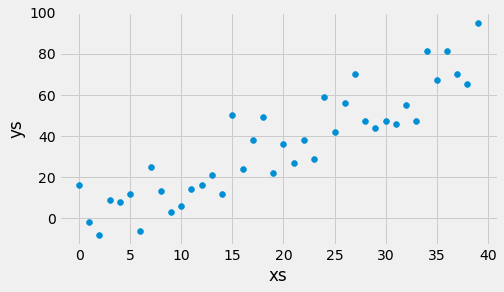

In [10]:
xs,ys = create_data_set(40,20,2,'pos')
plt.figure(figsize=(7,4))
plt.scatter(xs,ys)
plt.xlabel('xs')
plt.ylabel('ys')

### regression equation  :  

The simplest form of the regression equation with one dependent and one independent variable.

y = m * x + b

y = estimated dependent value.

b = constant , bias or intercept.

m = regression coefficient or slope.

x = value of the independent variable

In [13]:
def slop_and_intercept(xs,ys):
    m = ((mean(xs)*mean(ys)) - (mean(xs*ys)))/((mean(xs)**2) - (mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b

In [14]:
# the m and b for the xs and ys that we were created before
m,b = slop_and_intercept(xs,ys)
print("slop={}".format(m))
print("intercept={}".format(b))

slop=1.998311444652908
intercept=-3.3670731707317074


### plot xs and ys with regression line  : 
plot xs and ys with regression line(y = m * x + b) 

Text(0, 0.5, 'ys')

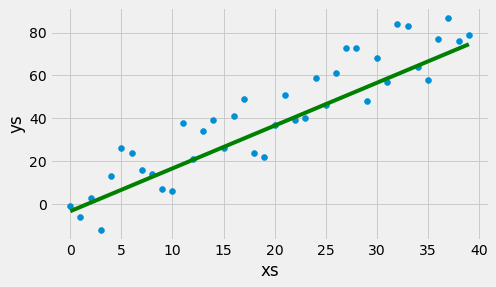

In [15]:
# need to calculate y_reg according to m and b 
y_reg = [m*x+b for x in xs]
xs,ys = create_data_set(40,20,2,'pos')
plt.figure(figsize=(7,4))
plt.scatter(xs,ys)
plt.plot(xs,y_reg,c='g')
plt.xlabel('xs')
plt.ylabel('ys')

### coefficient of determination


The coefficient of determination (denoted by R^2) is a key output of regression analysis a measure that assesses the ability of a model to predict or explain an outcome in the linear regression setting. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

The coefficient of determination is the square of the correlation (r) between predicted y scores and  the predictor variable x 

a high R^2 value(between 0 and 1) indicates that the model is a good fit for the data

The coefficient of determination can be found with the following formula: R2 = MSS/TSS = (TSS − RSS)/TSS = (1-RSS/TSS) 

MSS is the model sum of squares : which is the sum of the squares of the prediction from the linear regression minus the mean for that variable

TSS is the total sum of squares: which is the sum of the squares of the measurements minus their mean 

RSS is the residual sum of squares: which is the sum of the squares of the measurements minus the prediction from the linear regression.



In [16]:
# first create function to calculate squared errors: 
def squared_error(y_orig,y_line):
    return sum((y_orig-y_line)**2)
# second create function to calculate coefficient of determination 
def coefficient_of_determination(y_orig,y_line):
    y_mean_line= [mean(y_orig) for y in y_orig]
    RSS = squared_error(y_orig,y_line)
    TSS = squared_error(y_orig,y_mean_line)
    return  1 - (RSS/TSS)

In [17]:
# now we will use ys and y_reg to calculate coefficient_of_determination 
R_squared  = coefficient_of_determination(ys,y_reg)
print(R_squared)

0.8076989366173496


In [18]:
# if we need to predict y (for x = 50) based on above linear regression model(mx+b)
x = 50
predicted_y = m*x +b 
predicted_y

96.5484990619137

Text(0, 0.5, 'ys')

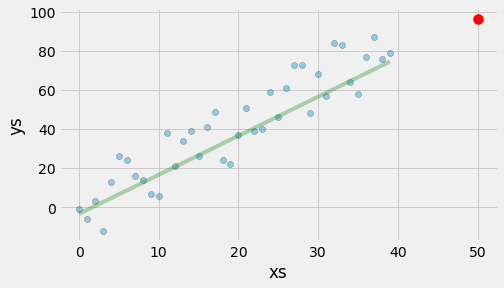

In [19]:
# plot predicted_y
plt.figure(figsize=(7,4))
plt.scatter(xs,ys,alpha =0.4,edgecolor='k')
plt.scatter(x,predicted_y,c='r',s=100)
plt.plot(xs,y_reg,c='g',alpha=0.3)
plt.xlabel('xs')
plt.ylabel('ys')

### how linear regression work with non-Linear Data: 

we will use the same previous steps to estimate the Linear regression by creating new datasets with high variance and calculte R^2 

Text(0, 0.5, 'ys')

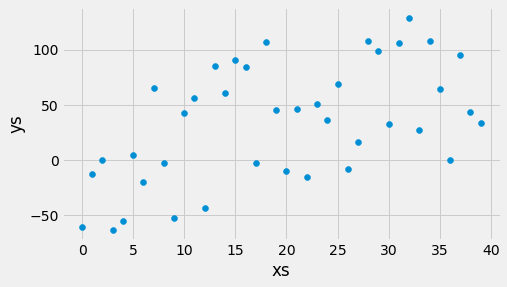

In [20]:
# create data set same number of samples with variance = 80 
xs,ys = create_data_set(40,80,2,'pos')
plt.figure(figsize=(7,4))
plt.scatter(xs,ys)
plt.xlabel('xs')
plt.ylabel('ys')

In [22]:
# find m and b 
m,b = slop_and_intercept(xs,ys)

Text(0, 0.5, 'ys')

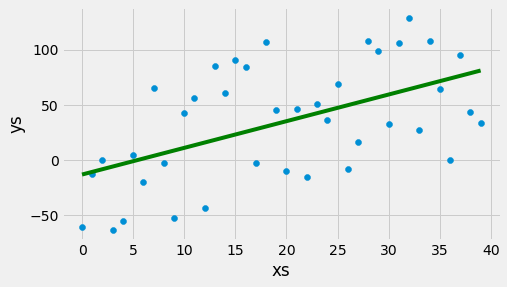

In [23]:
# find y_reg and plot regression line 
y_reg = [m*x+b for x in xs]
plt.figure(figsize=(7,4))
plt.scatter(xs,ys)
plt.plot(xs,y_reg,c='g')
plt.xlabel('xs')
plt.ylabel('ys')

In [24]:
# Calculate R_squared
R_squared  = coefficient_of_determination(ys,y_reg)
R_squared

0.28518365904476317

the result shows that the R_squared low when we used non linear data set 